# Phase 4 Code Challenge Review

Made using resources that Max put together, thanks Max!

## Overview

- Principal Component Analysis
- Clustering
- Time Series
- Natural Language Processing

In [1]:
# Basic Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# from src.call import call_on_students

# 1) Principal Component Analysis

![pca gif saved from learnco](images/pca.gif)

## PCA Concepts

### 1: What does PCA do? 

Specifically, describe what the first principal component represents in relation to the original data.

In [3]:
# call_on_students(1)

#### Answer: 
Principal Component Analysis:

- reduces the dimensionality of our data to preserve information
- projects data from a higher-dimensional space to a lower-dimensional space
- preserves as much variance as possible from our original dataset
- used to compress data
- preprocessing
- uses eigen decomposition to produce eigenvalues (variance explained) and eigenvectors (component weights)

### 2: What are some reasons to use PCA?

In [4]:
# call_on_students(1)

#### Answer: 

- reduce dimensions, features, reduce complexity
- this might result in faster training for supervised learning
- principal components are orthogonal to each other (right angles) --> eliminate all multicolinearity
- can help visual structure of large datasets based on the first few components
- CON: lose a bit of interpretability


### 3: Why is scaling important for PCA?

In [5]:
# call_on_students(1)

#### Answer: 

- puts all of our features/data in the same units, scale, range
- to not weight features with small or large scales differently 
- distanced based!


### 4: How can one determine how many principle components to use in a model?

In [6]:
# call_on_students(1)

#### Answer: 

- Can set n_components based on proportion of variance you want explained (ie. 0.95, our PCs explain at least 95% of the variance in data)
- could also hard set based on integer value
- for visualization only need 2 or 3
- look at the explained variance (cumsum() maybe) and find where we start having diminishing returns

## PCA in Code

### Set Up

In [7]:
from sklearn.datasets import  load_breast_cancer

data = load_breast_cancer()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 5: Prepare our Data for PCA

What steps do we need to take to preprocess our data effectively?

- drop nulls
- scale data!


In [8]:
# call_on_students(1)

In [9]:
# Code to preprocess X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

### 6: Import PCA, Then Instantiate and Fit a PCA Object

In [10]:
# call_on_students(1)

In [12]:
# Code to import, instantiate and fit a PCA object
from sklearn.decomposition import PCA

#Instantiate
pca_transformer = PCA(n_components=0.95, random_state=42)

#Fit
#pca_transformer.fit(X_sc)
#pca_data = Pca_transformer.transoform(X_sc)

pca_data = pca_transformer.fit_transform(X_sc)
pca_data

array([[ 9.19283683,  1.94858307, -1.12316616, ..., -0.39840723,
        -0.15711836, -0.87740188],
       [ 2.3878018 , -3.76817174, -0.52929269, ...,  0.24098846,
        -0.71190482,  1.10699494],
       [ 5.73389628, -1.0751738 , -0.55174759, ...,  0.09737374,
         0.02406564,  0.4542754 ],
       ...,
       [ 1.25617928, -1.90229671,  0.56273053, ...,  0.34188704,
         0.39391682,  0.52087738],
       [10.37479406,  1.67201011, -1.87702933, ..., -0.28023861,
        -0.54203454, -0.08929612],
       [-5.4752433 , -0.67063679,  1.49044308, ...,  1.04635352,
         0.37410111, -0.04772557]])

### 7: How Much Variance is Explained by the First 2 Components?

In [13]:
# call_on_students(1)

In [14]:
# Code here to answer the question
pca_transformer.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978])

In [19]:
pca_transformer.explained_variance_ratio_[:2]

array([0.44272026, 0.18971182])

In [20]:
pca_transformer.explained_variance_ratio_[:2].cumsum()

array([0.44272026, 0.63243208])

In [21]:
sum(pca_transformer.explained_variance_ratio_[:2])

0.6324320765155941

#### Answer:

- 63.24%


In [23]:
#EigenValues
pca_transformer.explained_variance_

array([13.30499079,  5.7013746 ,  2.82291016,  1.98412752,  1.65163324,
        1.20948224,  0.67640888,  0.47745625,  0.41762878,  0.35131087])

In [25]:
#EigenVectors
pca_transformer.components_

array([[ 2.18902444e-01,  1.03724578e-01,  2.27537293e-01,
         2.20994985e-01,  1.42589694e-01,  2.39285354e-01,
         2.58400481e-01,  2.60853758e-01,  1.38166959e-01,
         6.43633464e-02,  2.05978776e-01,  1.74280281e-02,
         2.11325916e-01,  2.02869635e-01,  1.45314521e-02,
         1.70393451e-01,  1.53589790e-01,  1.83417397e-01,
         4.24984216e-02,  1.02568322e-01,  2.27996634e-01,
         1.04469325e-01,  2.36639681e-01,  2.24870533e-01,
         1.27952561e-01,  2.10095880e-01,  2.28767533e-01,
         2.50885971e-01,  1.22904556e-01,  1.31783943e-01],
       [-2.33857132e-01, -5.97060883e-02, -2.15181361e-01,
        -2.31076711e-01,  1.86113023e-01,  1.51891610e-01,
         6.01653628e-02, -3.47675005e-02,  1.90348770e-01,
         3.66575471e-01, -1.05552152e-01,  8.99796818e-02,
        -8.94572342e-02, -1.52292628e-01,  2.04430453e-01,
         2.32715896e-01,  1.97207283e-01,  1.30321560e-01,
         1.83848000e-01,  2.80092027e-01, -2.19866379e-

# 2) Clustering

## Clustering Concepts

### 8: Describe how the K-Means algorithm updates its cluster centers after initialization.

In [26]:
# call_on_students(1)

#### Answer:

- set initial number of cluster centers (centorids) based on K number (n_clusters). randomnly assign to data points
- calculate distance from each centroid to every data point
- assign data points to their closest centroid
- adjust the centroid based on the mean of all the data points assigned to it
- remeasure distances, and reassign points to closest as needed
- repeat this process skipping step one, until centroids no longer move or we hit a set tolerance 
- try again with a new starting centorids
- algorithm will pick the result that minimizes intra-cluster (within clusters) distance and maximizes our inter-cluster (between clusters) distance


### 9: What is inertia, and how does K-Means use inertia to determine the best estimator?

Please also describe the method you can use to evaluate clustering using inertia.

Documentation, for reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [27]:
# call_on_students(1)

#### Answer:

- elbow method or elbow plot
- uses Sum of Squared Errors (inertia) to find the best value of K
- measure of intra-cluster ditance


### 10: What other metric do we have to score the clusters which are formed?

Describe the difference between it and inertia.

In [28]:
# call_on_students(1)

#### Answer:

- silhouette coefficient, silhouette score
- ranges between -1 and 1, closer to 1 denotes 'better' clustering
- want the highest silhouette score
- measure of both intra and inter cluster distance

## Clustering in Code with Heirarchical Agglomerative Clustering

After the above conceptual review of KMeans, let's practice coding with agglomerative clustering.


### Set Up

In [29]:
# New dataset for this section!
from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data['data'])

In [30]:
X

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### 11: Prepare our Data for Clustering

What steps do we need to take to preprocess our data effectively?

- clustering is distance based
- null values
- scale!


In [31]:
# call_on_students(1)

In [32]:
# Code to preprocess the data
# Name the processed data X_processed
clus_scaler = StandardScaler()

X_processed = clus_scaler.fit_transform(X)

### 12: Import the Relevant Class, Then Instantiate and Fit a Hierarchical Agglomerative Clustering Object

Let's use `n_clusters = 2` to start (default)

In [33]:
# call_on_students(1)

In [34]:
# Import the relevent clustering algorithm
from sklearn.cluster import AgglomerativeClustering

In [35]:
#Instantiate
hac = AgglomerativeClustering(n_clusters=2)
# Fit the object
hac.fit(X_processed)

AgglomerativeClustering()

In [36]:
# Calculate a silhouette score
from sklearn.metrics import silhouette_score

In [37]:
labels1 = hac.fit_predict(X_processed)
labels1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [39]:
labels2 = hac.labels_
labels2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [40]:
labels1 == labels2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [41]:
silhouette_score(X_processed, labels1)

0.5770346019475989

### 13: Write a Function to Test Different Options for `n_clusters`

The function should take in the number for `n_clusters` and the data to cluster, fit a new clustering model using that parameter to the data, print the silhouette score, then return the labels attribute from the fit clustering model.

In [42]:
# call_on_students(1)

In [47]:
def test_n_for_clustering(n, data):
    """ 
    Tests different numbers for the hyperparameter n_clusters
    Prints the silhouette score for that clustering model
    Returns the labels that are output from the clustering model

    Parameters: 
    -----------
    n: float object
        number of clusters to use in the agglomerative clustering model
    data: Pandas DataFrame or array-like object
        Data to cluster

    Returns: 
    --------
    labels: array-like object
        Labels attribute from the clustering model
    """
    # Instantiate
    hac = AgglomerativeClustering(n_clusters=n)
    
    # Fit the new clustering model
    hac.fit(data)
    
    labels = hac.labels_
    # Print the silhouette score
    print(silhouette_score(data, hac.labels_))
    
    # Return the labels attribute from the fit clustering model
    return labels

In [48]:
# Testing your function

for n in range(2, 9):
    test_n_for_clustering(n, X_processed)

0.5770346019475989
0.446689041028591
0.4006363159855973
0.33058726295230545
0.3148548010051283
0.316969830299128
0.310946529007258


# 3) Time Series

In [49]:
# New dataset for this section!
ap = pd.read_csv('data/AirPassengers.csv')
ap.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### 14: Prepare our Data for Time Series Analysis

What steps do we need to take to preprocess our data effectively?

- create datetime object for our date column ('Month')
- set datetime as index


In [50]:
# call_on_students(1)

In [51]:
# Code here 
ap.set_index(pd.to_datetime(ap['Month']), inplace=True)
ap.head()

,Month,#Passengers
Month,,
1949-01-01,1949-01,112
1949-02-01,1949-02,118
1949-03-01,1949-03,132
1949-04-01,1949-04,129
1949-05-01,1949-05,121


In [52]:
ap_ts = ap['#Passengers']
ap_ts

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [53]:
ap.head()

,Month,#Passengers
Month,,
1949-01-01,1949-01,112
1949-02-01,1949-02,118
1949-03-01,1949-03,132
1949-04-01,1949-04,129
1949-05-01,1949-05,121


In [54]:
# Another Way
ap_ts2 = pd.Series(data=ap['#Passengers'].values, 
                   index=pd.to_datetime(ap['Month']))

In [55]:
ap_ts2

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Length: 144, dtype: int64

In [59]:
# Third Way
ap_ts3 = ap['#Passengers']
ap_ts3.index = pd.to_datetime(ap['Month'])
ap_ts3

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

### 15: Explore Patterns in the Data

In [56]:
# call_on_students(1)

First: what kinds of patterns can one find in time series data?

- Seasonality / Periodicity
- irregularities (random flucuations)
    - capture homoscedasticity/heteroscedasticity
- cyclical (unpredictable periods)
- trends (upward/downward movement of mean)
    - could be linear or exponential, negative or positive

Second, plot this time series data. What kinds of patterns do you see in this dataset?

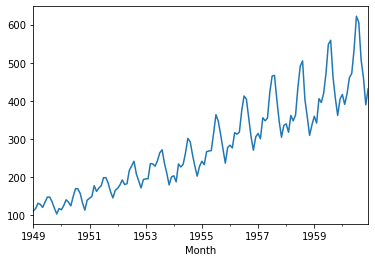

In [58]:
# Code to plot the time series
ap_ts.plot();

- Linear positive trend and annual seasonality
- some heterness going on in variance

### 16: Explore the Moving Average

What window would make sense to use for this data?

- window = 12 = yearly moving average


In [60]:
# call_on_students(1)

In [62]:
# Code to create the moving average
moving_avg_yearly = ap_ts.rolling(window=12).mean()

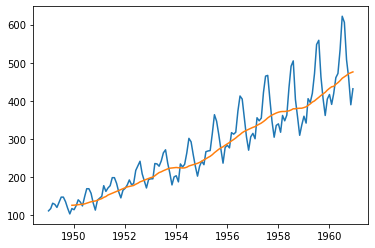

In [63]:
# Add to the moving average to the above plot
plt.plot(ap_ts)
plt.plot(moving_avg_yearly);

### 17: Explore Stationarity


In [64]:
# call_on_students(1)

Why do we try to make our data stationary?

- so that values are not dependent on time (date)
- the mean, variance, and covariance of the time serties do not change over time


What can we do to make our data stationary?

- difference: subtract previous value from the current one
    - second order difference: difference the 1st order differences
- transofrmation: log or maybe sqrt
- subtract rolling avg from our data


### 18: Check Stationarity

In [65]:
# call_on_students(1)

In [66]:
# Code here to check if the data is stationary
from statsmodels.tsa.stattools import adfuller

In [67]:
adfuller(ap_ts)[1]

0.9918802434376408

### 19: Try to Make the Data Stationarity

Implement one strategy to try to make the data more stationary, then check if it worked.

In [68]:
# call_on_students(1)

In [69]:
# Code here to try to make the data stationary
diff_ts = ap_ts.diff()[1:]
diff_ts

Month
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
1949-06-01    14.0
              ... 
1960-08-01   -16.0
1960-09-01   -98.0
1960-10-01   -47.0
1960-11-01   -71.0
1960-12-01    42.0
Name: #Passengers, Length: 143, dtype: float64

In [70]:
# Code here to check if the data is stationary
adfuller(diff_ts)

(-2.8292668241699945,
 0.05421329028382621,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854084)

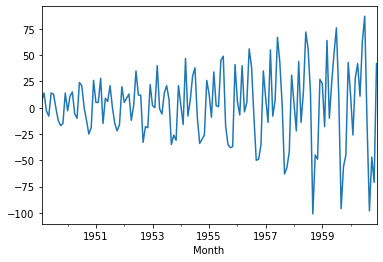

In [72]:
diff_ts.plot();

<a id='clust'></a>

# 4) Natural Language Processing

## NLP Concepts

### Some Example Text

In [73]:
# Each sentence is a document
sentence_one = "Harry Potter is the best young adult book about wizards"
sentence_two = "Um, EXCUSE ME! Ever heard of Earth Sea?"
sentence_three = "I only like to read non-fiction.  It makes me a better person."

# The corpus is composed of all of the documents
corpus = [sentence_one, sentence_two, sentence_three]

### 20: NLP Pre-processing

List at least three steps you can take to turn raw text like this into something that would be semantically valuable (aka ready to turn into numbers):

In [74]:
# call_on_students(1)

#### Answer:

1. tokenize 
2. stem or lemmatize
3. lowercase
4. remove punctuation
5. remove stopwords (common words)

### 21: Describe what vectorized text would look like as a dataframe.

If you vectorize the above corpus, what would the rows and columns be in the resulting dataframe (aka document term matrix)

In [75]:
# call_on_students(1)

#### Answer:

- Columns: words (or tokens) from the corpus aka our 'features'
- Rows: each unique document from our corpus is a row
- Counts or score would be the values

### 22: What does TF-IDF do?

Also, what does TF-IDF stand for?

In [ ]:
# call_on_students(1)

#### Answer:

- term frequency: inverse document frequency
- uses frequency of words within the document and across our full corpus (IDF) to determine the importance or 'rarity' of the token
- score of importance for that token to a specific document


## NLP in Code

### Set Up

In [76]:
# New section, new data
policies = pd.read_csv('data/2020_policies_feb_24.csv')

def warren_not_warren(label):
    
    '''Make label a binary between Elizabeth Warren
    speeches and speeches from all other candidates'''
    
    if label =='warren':
        return 1
    else:
        return 0
    
policies['candidate'] = policies['candidate'].apply(warren_not_warren)

The dataframe loaded above consists of policies of 2020 Democratic presidential hopefuls. The `policy` column holds text describing the policies themselves.  The `candidate` column indicates whether it was or was not an Elizabeth Warren policy.

In [77]:
policies.head()

,Unnamed: 0,name,policy,candidate
0,0,100% Clean Energy for America,"As published on Medium on September 3rd, 2019:...",1
1,1,A Comprehensive Agenda to Boost America’s Smal...,Small businesses are the heart of our economy....,1
2,2,A Fair and Welcoming Immigration System,"As published on Medium on July 11th, 2019:\r\n...",1
3,3,A Fair Workweek for America’s Part-Time Workers,Working families all across the country are ge...,1
4,4,A Great Public School Education for Every Student,I attended public school growing up in Oklahom...,1


The documents for activity are in the `policy` column, and the target is candidate. 

### 23: Import the Relevant Class, Then Instantiate and Fit a Count Vectorizer Object

In [78]:
# call_on_students(1)

In [79]:
# First! Train-test split the dataset
from sklearn.model_selection import train_test_split

X = policies['policy']
y = policies['candidate']

# Code here to train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [80]:
# Import the relevant vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [82]:
from nltk.corpus import stopwords

In [83]:
stopwords

<WordListCorpusReader in 'C:\\Users\\Alvaro Rodriguez\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'>

In [84]:
# Instantiate it
cv = CountVectorizer(stop_words=stopwords.words('english'))

In [85]:
# Fit it
cv.fit(X_train)

CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

### 24: Vectorize Your Text, Then Model

In [86]:
# call_on_students(1)

In [87]:
# Code here to transform train and test sets with the vectorizer
X_train_vec = cv.transform(X_train)
X_test_vec = cv.transform(X_test)

In [88]:
X_train_vec.todense()

matrix([[3, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [6, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [89]:
# Importing the classifier...
from sklearn.ensemble import RandomForestClassifier

# Code here to instantiate and fit a Random Forest model
tff = RandomForestClassifier(random_state=42)
tff.fit(X_train_vec, y_train)

RandomForestClassifier(random_state=42)

In [90]:
# Code here to evaluate your model on the test set
print(tff.score(X_train_vec, y_train))

# Test
print(tff.score(X_test_vec, y_test))

1.0
0.8958333333333334
